La red neuronal va a tener 4 capas ocultas, y todas las capas tendrán como función de activación elu. Aunque es la más costosa computacionalmente, se observa que es la que mejores resultados proporciona entre el resto en este caso, para todas las capas. En el caso de la función Relu, aparece más "rectificada", aunque similar a la ELU, y en el resto (sigmoidal, tanh, linear...) los resultados obtenidos son peores.

Como optimizador he utilizado el algoritmo RMSprop, y como función a minimizar MSE

He probado con diferentes técnicas de regularización: Dropout, L2... pero los resultados son peores, esta es la combinación que obtiene mejores resultados (menor mse), aunque sí he observado que cuanto mayor sea el tamaño de la muestra se obtiene una aproximación mejor, y lo mismo para el número de capas, aunque por ejemplo para el caso de entre 3 y 4 capas la diferencia es muy pequeña.

In [29]:
import numpy as np
from scipy.stats import norm   #import gaussian cdf and pdf

In [30]:
# EVALUATE BS ..
def BS_norm_price(F, K, T, vol):
  sigma_sqrt_t = vol * np.sqrt(T)
  d1 = (F - K) / sigma_sqrt_t
  
  return (F-K) * norm.cdf(d1) + sigma_sqrt_t * norm.pdf(d1)
# ----------------------------------------------

In [31]:
size = 100000    # sample size
K = np.random.random_sample(size) * 0.2 - 0.1; F = 0.01; T = 5; vol = 0.01

In [32]:
price = []
for i in K:
    p = BS_norm_price(F,i,T,vol)
    price.append(p)

In [33]:
X_train = K[:int(0.8*size)]; X_test = K[int(0.8*size):]
y_train = price[:int(0.8*size)]; y_test = price[int(0.8*size):]

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [35]:
model = Sequential()
model.add(Dense(256, activation='elu', input_dim=1))
model.add(Dense(128, activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(1, activation='elu'))

In [36]:
sgd = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=sgd,
              metrics=['mse'])

In [39]:
epochs = 35
batch_size = 128
# Fit the model weights.
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

Train on 80000 samples, validate on 20000 samples
Epoch 1/35
80000/80000 [==============================] - 2s 30us/step - loss: 1.3241e-05 - mean_squared_error: 1.3241e-05 - val_loss: 4.6632e-07 - val_mean_squared_error: 4.6632e-07
Epoch 2/35
80000/80000 [==============================] - 3s 31us/step - loss: 5.0917e-06 - mean_squared_error: 5.0917e-06 - val_loss: 1.1888e-06 - val_mean_squared_error: 1.1888e-06
Epoch 3/35
80000/80000 [==============================] - 2s 31us/step - loss: 3.9361e-06 - mean_squared_error: 3.9361e-06 - val_loss: 5.8917e-07 - val_mean_squared_error: 5.8917e-07
Epoch 4/35
80000/80000 [==============================] - 2s 31us/step - loss: 3.2827e-06 - mean_squared_error: 3.2827e-06 - val_loss: 2.9510e-06 - val_mean_squared_error: 2.9510e-06
Epoch 5/35
80000/80000 [==============================] - 3s 32us/step - loss: 3.0956e-06 - mean_squared_error: 3.0956e-06 - val_loss: 2.4221e-06 - val_mean_squared_error: 2.4221e-06
Epoch 6/35
80000/80000 [===========

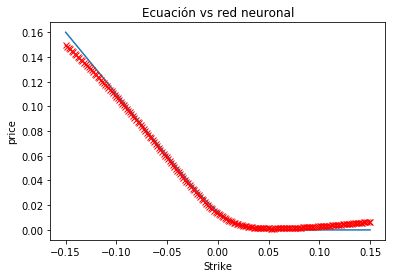

In [42]:
K_valid = np.linspace(-0.15, 0.15, 200)

price_valid = []
for i in K_valid:
    p = BS_norm_price(F,i,T,vol)
    price_valid.append(p)
    
#X_valid = np.hstack((np.ones([len(K_valid),3])*[F,T,vol],np.matrix(K_valid).T))
price_predict = model.predict(K_valid)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(K_valid,price_valid, label = 'equation');
plt.plot(K_valid,price_predict,'rx', label = 'ANN');
plt.title('Ecuación vs red neuronal'); plt.ylabel('price'); plt.xlabel('Strike');